# Features
The various features of the cleaned dataset are explained below:

- **Airline**: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
- **Flight**: Flight stores information regarding the plane's flight code. It is a categorical feature.
- **Source City**: City from which the flight takes off. It is a categorical feature having 6 unique cities.
- **Departure Time**: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
- **Stops**: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
- **Arrival Time**: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
- **Destination City**: City where the flight will land. It is a categorical feature having 6 unique cities.
- **Class**: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
- **Duration**: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
- **Days Left**: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
- **Price**: Target variable stores information of the ticket price.

Step 1: Importing necessary libraries. However, we shall import remaining libraries once we open the required dataset and the needed alogorithms.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Flight_Booking.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Step 2: Exploratory Data Analysis

In [3]:
# Removing unnecessary columns.
df.drop(columns=['Unnamed: 0','flight'], axis=1, inplace=True)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [5]:
df.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.describe(include='all')

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [7]:
df.shape

(300153, 10)

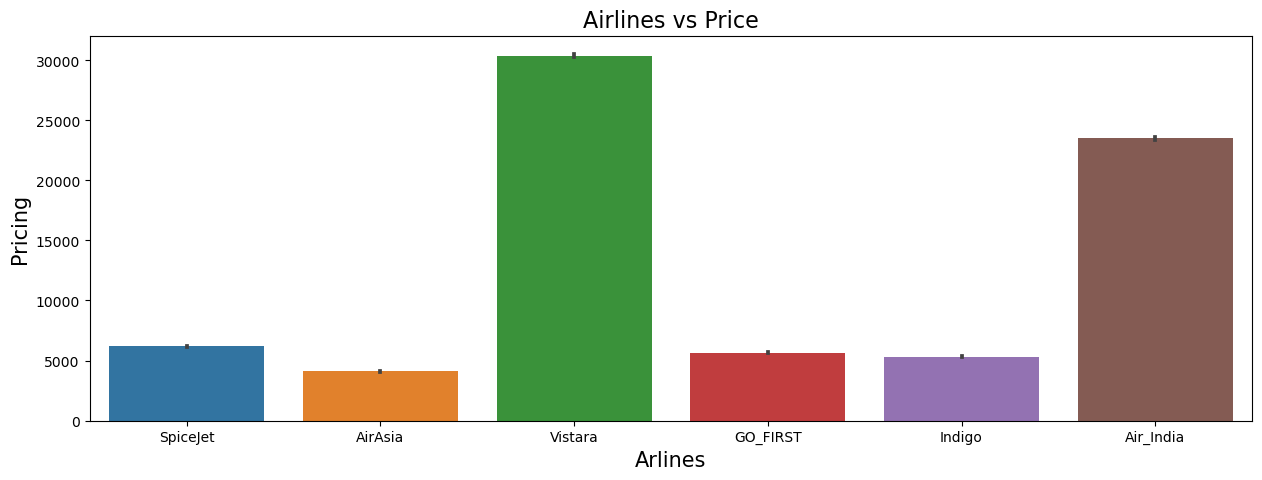

In [8]:
plt.figure(figsize= (15,5))
sns.barplot(x = df.airline, y =df.price)
plt.title('Airlines vs Price',fontsize=16)
plt.xlabel('Arlines', fontsize=15)
plt.ylabel('Pricing', fontsize=15)
plt.show()

> There is variation in pricing with Vistara being the expensive followed by Air India. Air Asia being the most affordable.

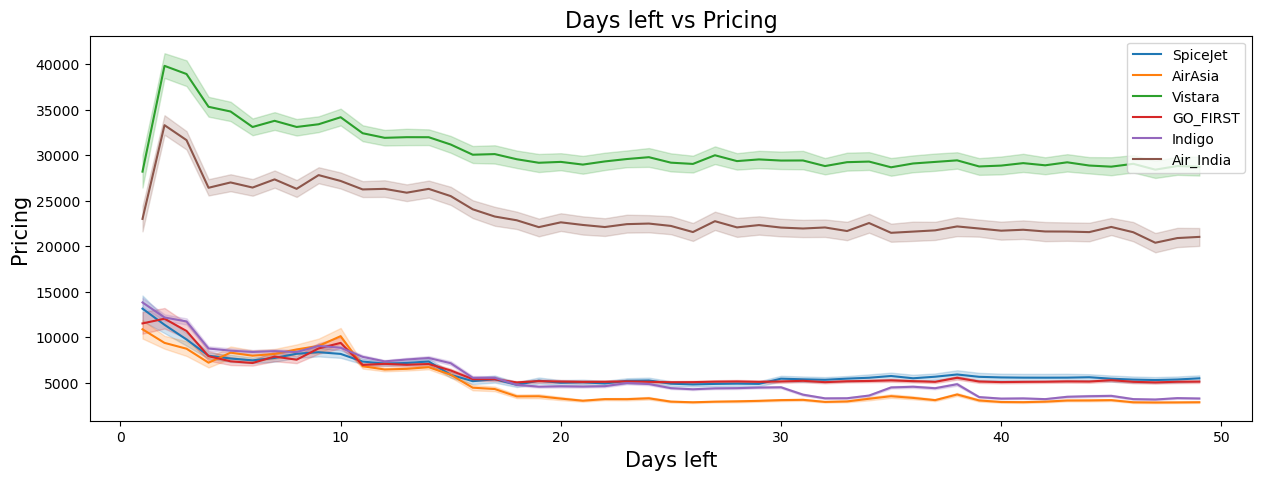

In [9]:
plt.figure(figsize= (15,5))
sns.lineplot(x=df.days_left, y = df.price, hue=df.airline)
plt.title('Days left vs Pricing',fontsize=16)
plt.xlabel('Days left', fontsize=15)
plt.ylabel('Pricing', fontsize=15)
plt.legend(loc='best')
plt.show()

>The price of the tickets hikes as the no of days descrease & this is noticable after 40 days or 10 days before departure. Again, with Vistara being costliest. 

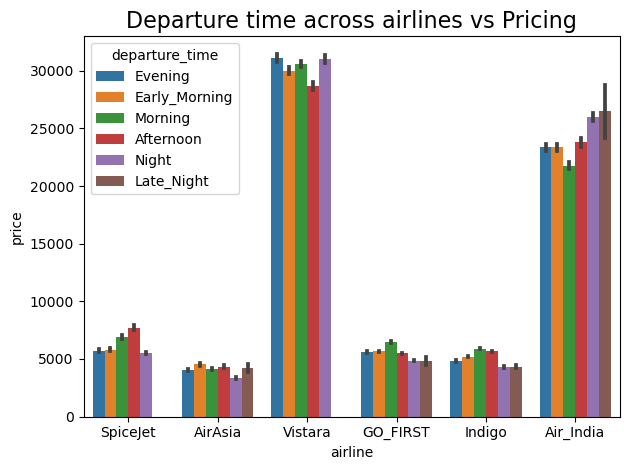

In [10]:
sns.barplot(y = df.price, x = df.airline, hue=df.departure_time)
plt.title("Departure time across airlines vs Pricing",fontsize=16)
plt.tight_layout()
plt.show()

>Pricing is different for departure time across airlines. However, within the carrier the pricing is somewhat similar. Vistara & Spiceject don't have late night flights.

In [11]:
cross = pd.crosstab(index=df['airline'], columns=df['stops'], )
cross

stops,one,two_or_more,zero
airline,,,
AirAsia,11418,2246,2434
Air_India,71004,3479,6409
GO_FIRST,19545,405,3223
Indigo,31166,738,11216
SpiceJet,6549,0,2462
Vistara,111181,6418,10260


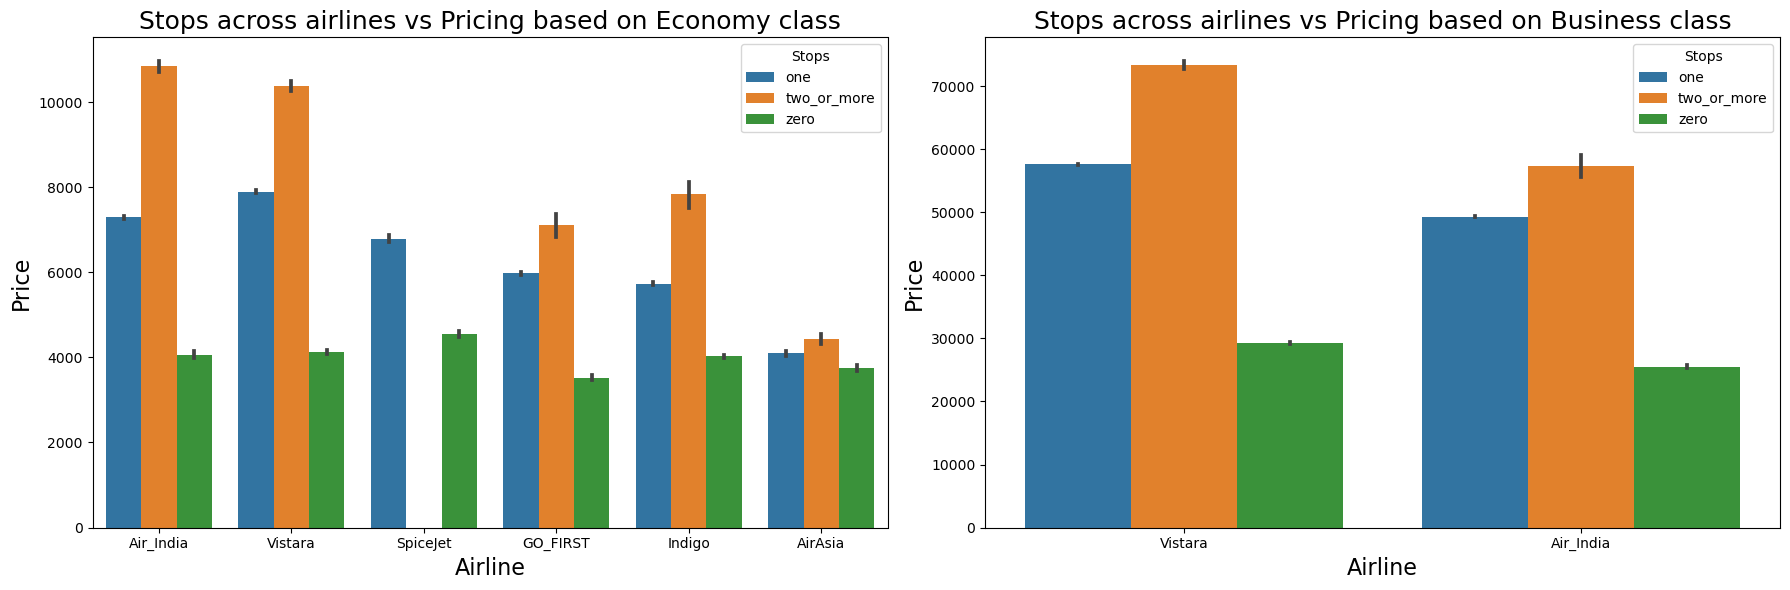

In [12]:
fig, axes = plt.subplots(1, 2,figsize=(18,6))

# First subplot
sns.barplot(y='price', x='airline', hue='stops', data=df[df['class'] == "Economy"].sort_values("price", ascending = False), ax=axes[0])
axes[0].set_title("Stops across airlines vs Pricing based on Economy class", fontsize=18)
axes[0].set_xlabel('Airline', fontsize=16)
axes[0].set_ylabel('Price', fontsize=16)
axes[0].legend(title="Stops")

# Second subplot
sns.barplot(y='price', x='airline', hue='stops', data=df[df['class'] == "Business"].sort_values("price", ascending = False), ax=axes[1])
axes[1].set_title("Stops across airlines vs Pricing based on Business class", fontsize=18)
axes[1].set_xlabel('Airline', fontsize=16)
axes[1].set_ylabel('Price', fontsize=16)
axes[1].legend(title="Stops")

plt.tight_layout()
plt.show()

>As stops increase the price also increases. 

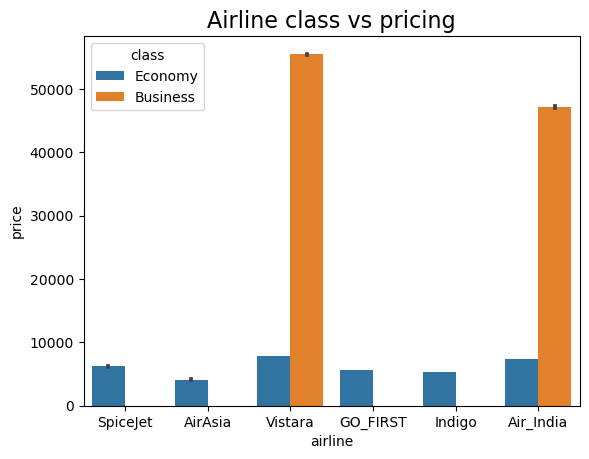

In [13]:
sns.barplot(y = df.price, x = df.airline, hue=df['class'])
plt.title("Airline class vs pricing",fontsize=16)
plt.show()

>As expected business class is atleast 5-6 times more expensive than economy class. Again, Vistara leading the chart. 
Vistara and Air India are the only 2 carriers offering Business class for domestic flights.    

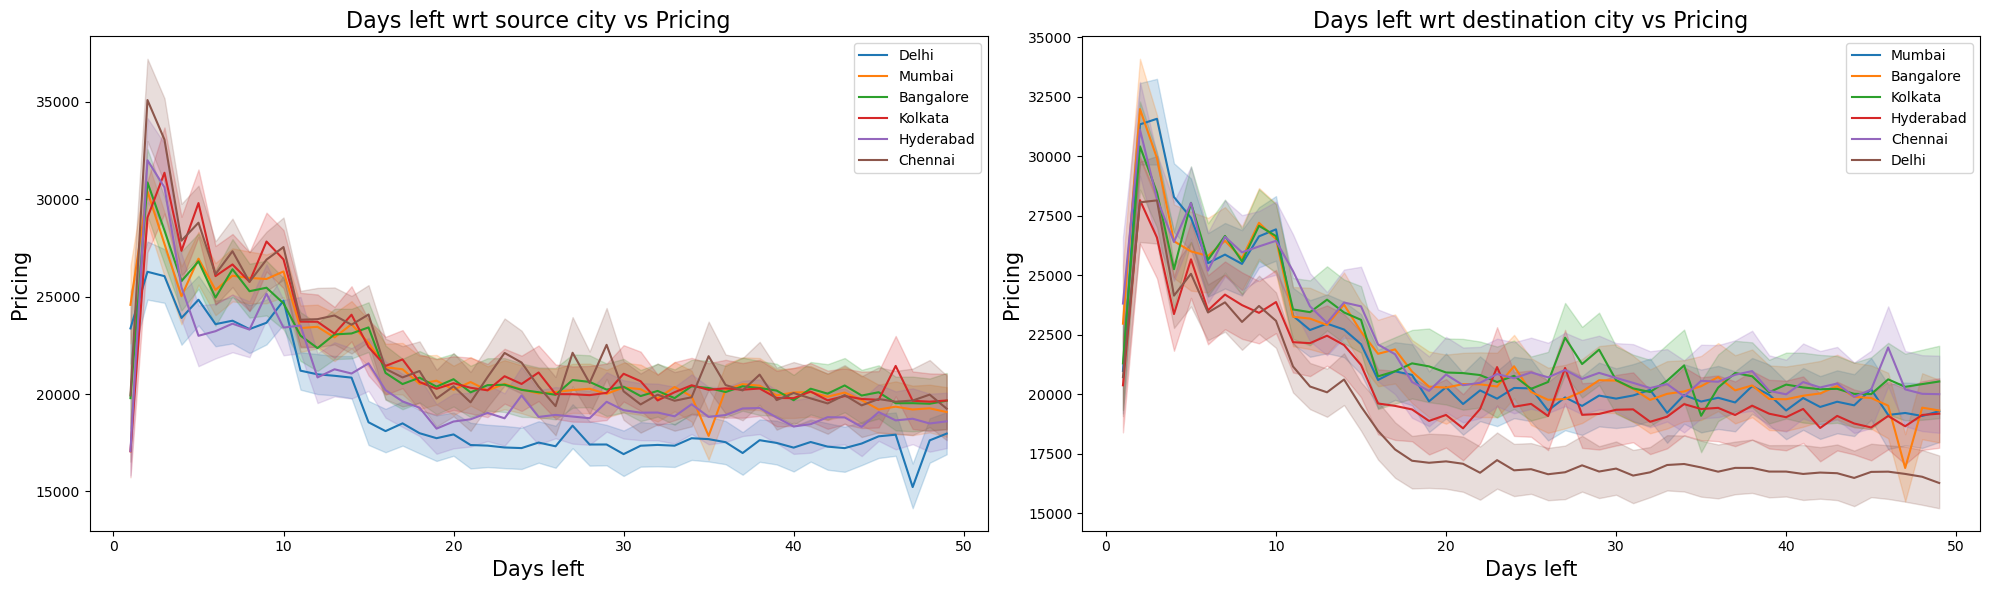

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(x=df.days_left, y=df.price, hue=df.source_city, ax=axes[0])
axes[0].set_title('Days left wrt source city vs Pricing', fontsize=16)
axes[0].set_xlabel('Days left', fontsize=15)
axes[0].set_ylabel('Pricing', fontsize=15)
axes[0].legend(loc='best')

sns.lineplot(x=df.days_left, y=df.price, hue=df.destination_city, ax=axes[1])
axes[1].set_title('Days left wrt destination city vs Pricing', fontsize=16)
axes[1].set_xlabel('Days left', fontsize=15)
axes[1].set_ylabel('Pricing', fontsize=15)
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()

>The price of tickets seems to increase between 1-2 days to 20 days until departure. Between 20 days to 50 days the price is relatively similar.

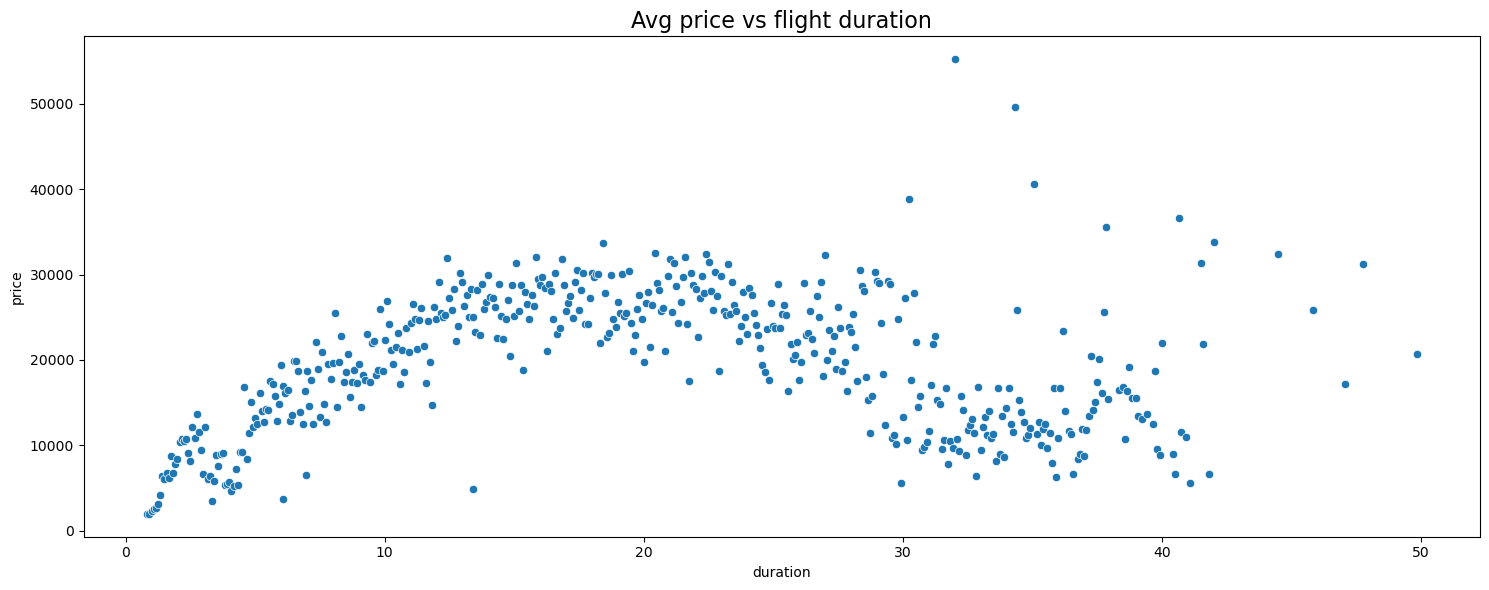

In [15]:
du_price = df.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
sns.scatterplot(x="duration", y="price", data=du_price).set_title("Avg price vs flight duration",fontsize=16)
plt.tight_layout()
plt.show()

> Avg flight price decreases after as the duration exceeds 20 hrs.

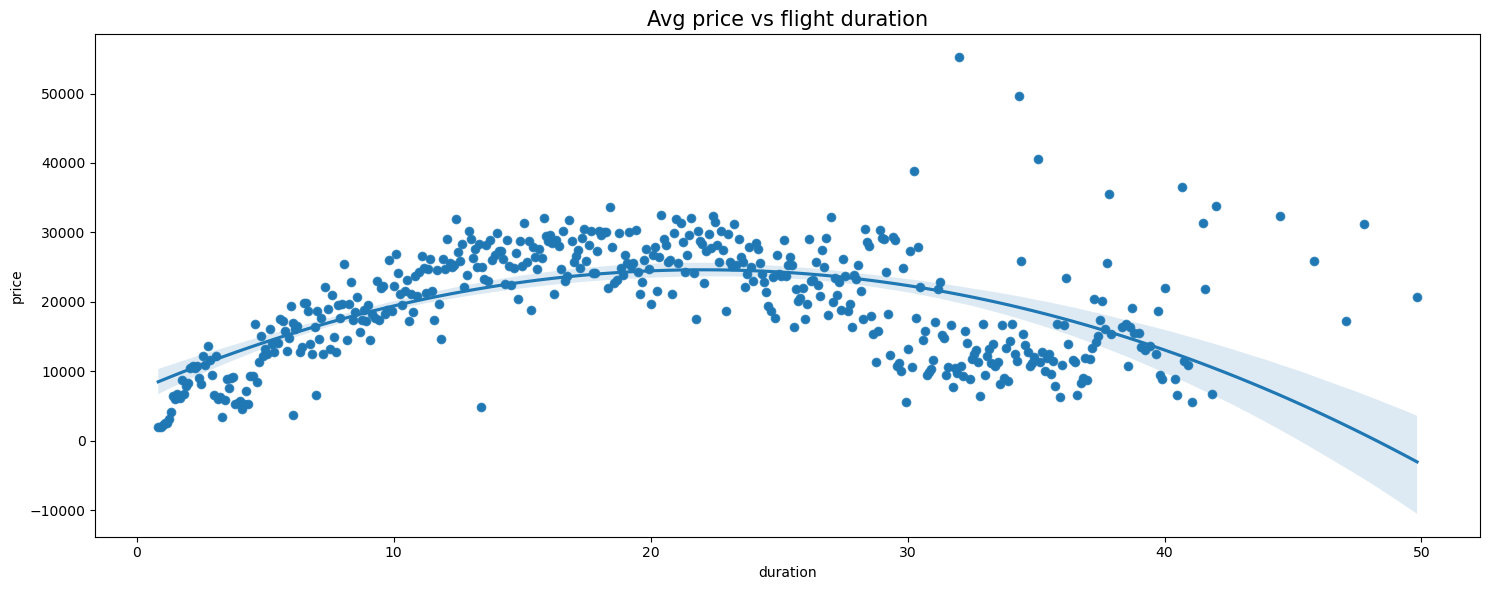

In [16]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="duration", y="price", data=du_price).set_title("Avg price vs flight duration",fontsize=15)
sns.regplot(x="duration", y="price", data=du_price, order=2)
plt.tight_layout()
plt.show()

> As we infere from previous plot. The avg flight descreases after 20 hrs. However, this trend is affected by a lot of outliers between 30 hrs to 50 hrs

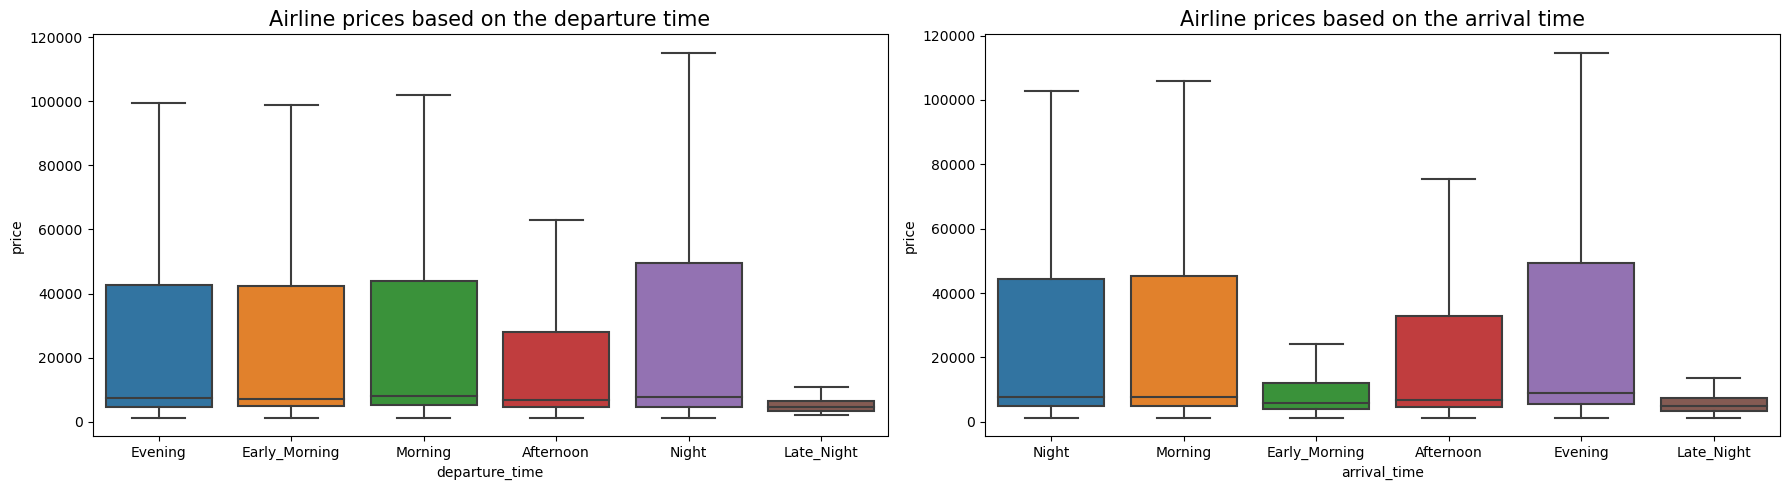

In [17]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time", showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)
plt.tight_layout()
plt.show()

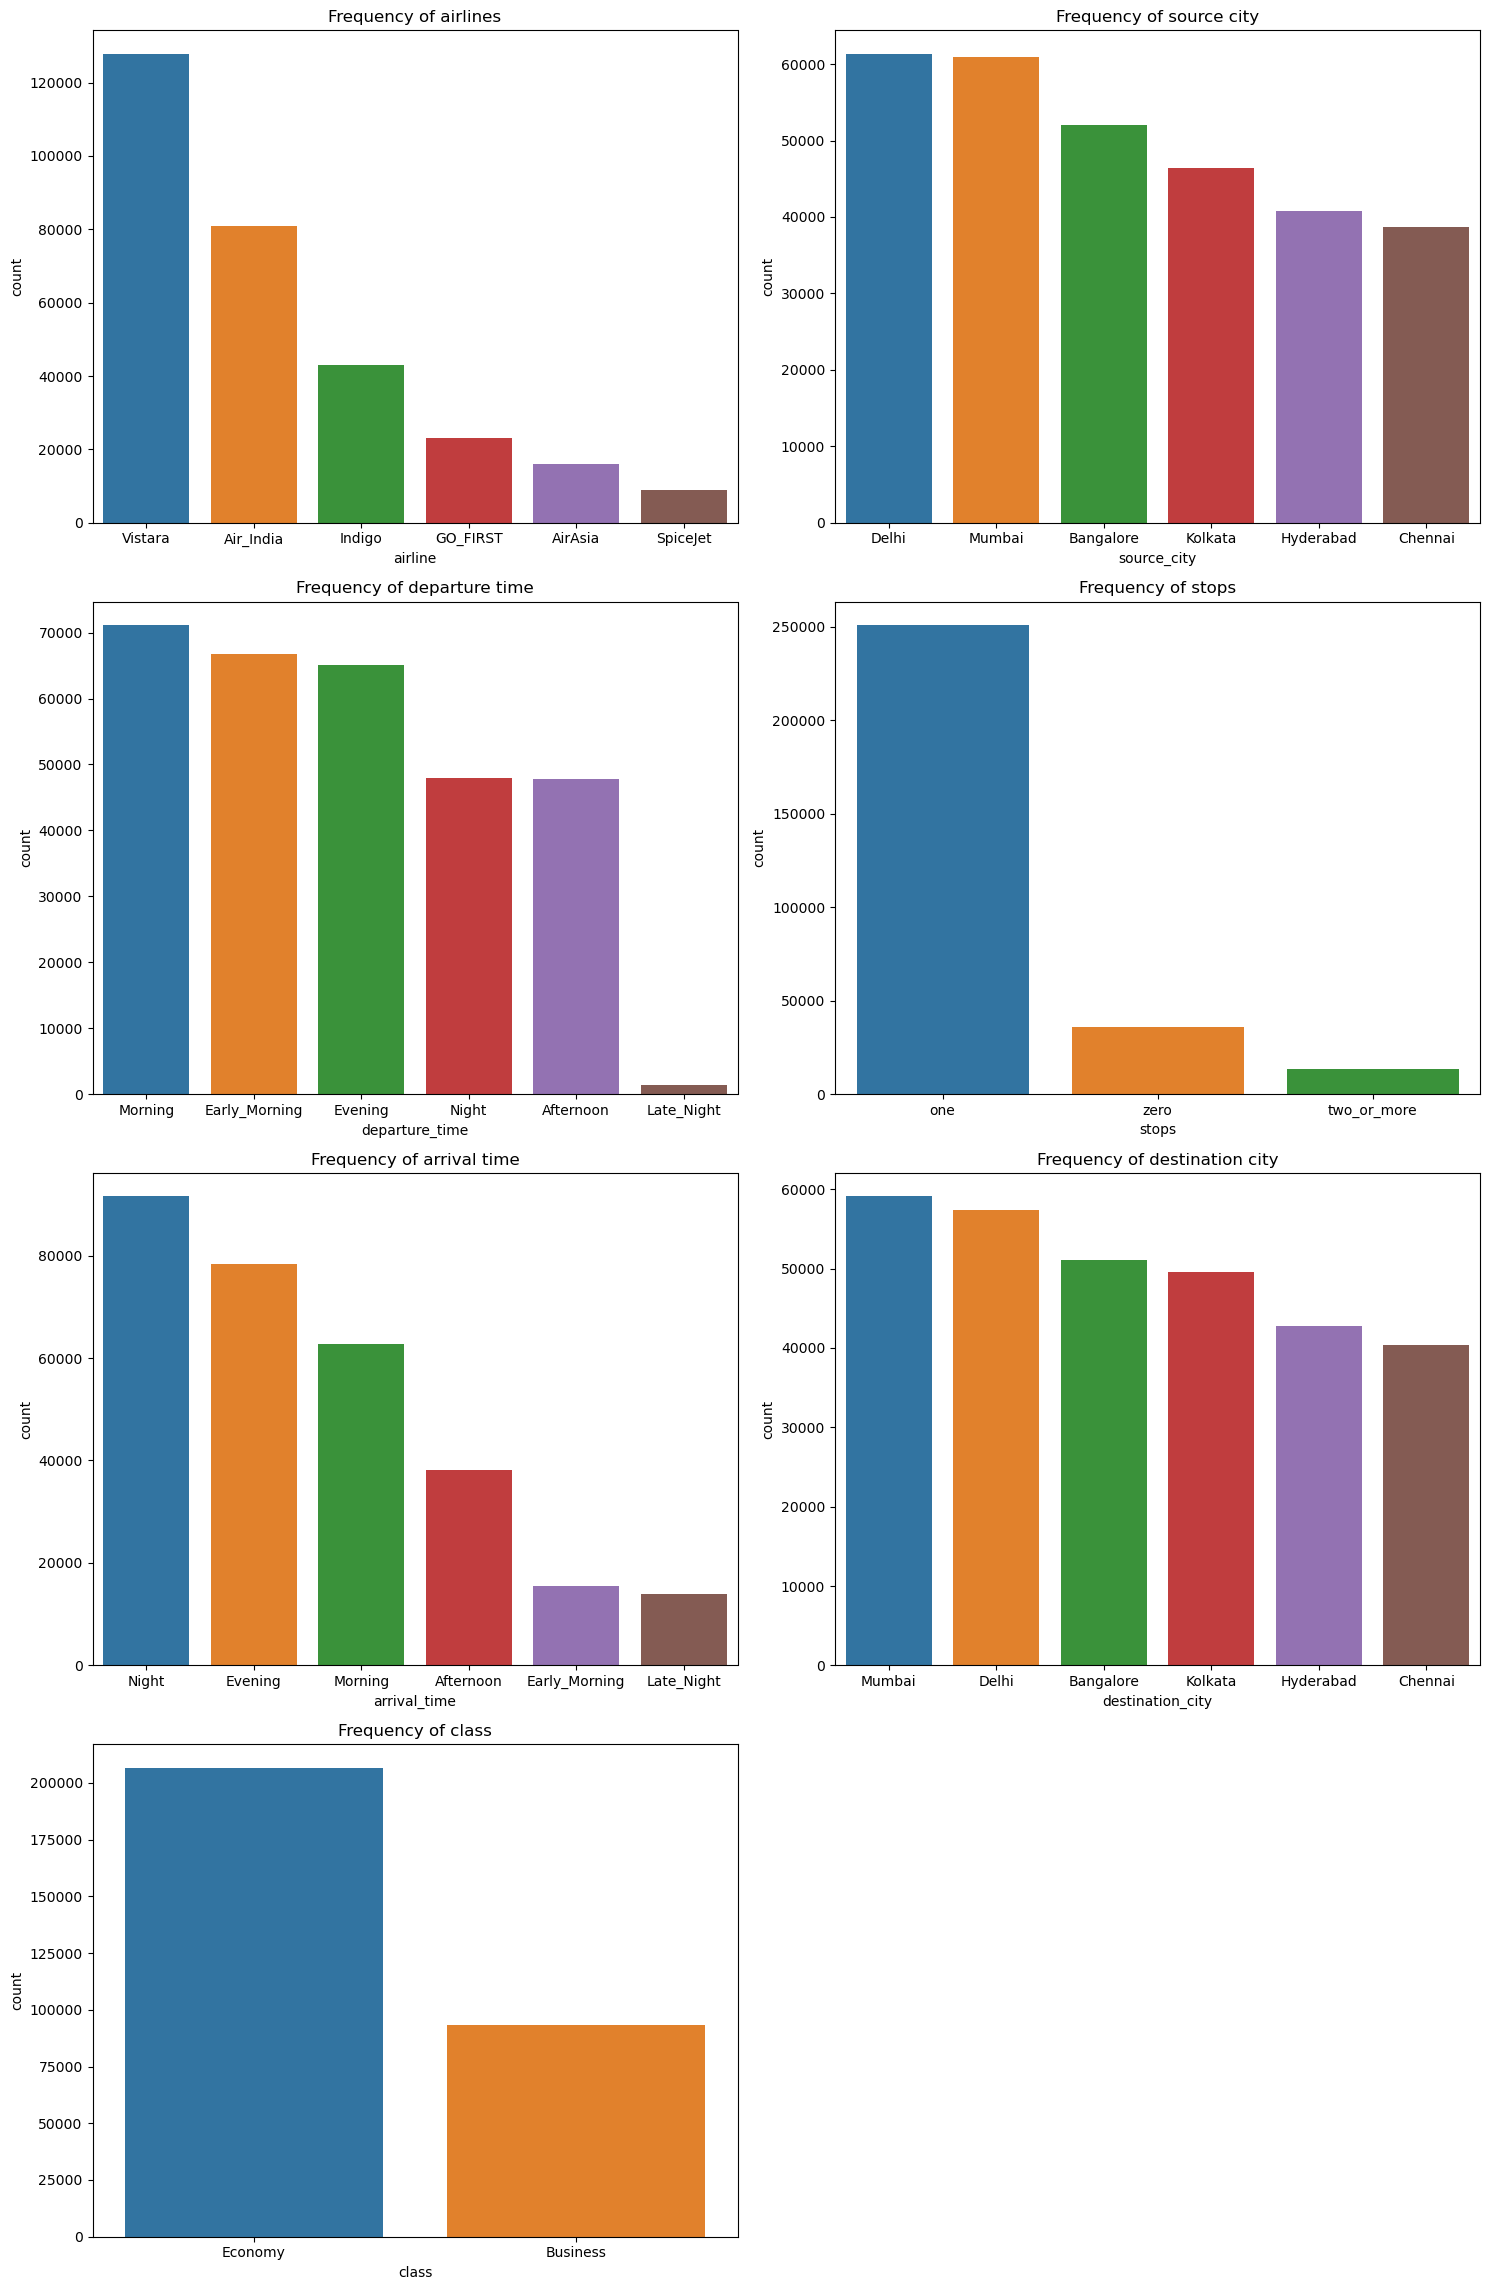

In [18]:
plt.figure(figsize=(15, 23))

plt.subplot(4, 2, 1)
sns.countplot(x=df['airline'], order=df['airline'].value_counts().index)
plt.title('Frequency of airlines')

plt.subplot(4, 2, 2)
sns.countplot(x=df['source_city'], order=df['source_city'].value_counts().index)
plt.title('Frequency of source city')

plt.subplot(4, 2, 3)
sns.countplot(x=df['departure_time'], order=df['departure_time'].value_counts().index)
plt.title('Frequency of departure time')

plt.subplot(4, 2, 4)
sns.countplot(x=df['stops'], order=df['stops'].value_counts().index)
plt.title('Frequency of stops')

plt.subplot(4, 2, 5)
sns.countplot(x=df['arrival_time'], order=df['arrival_time'].value_counts().index)
plt.title('Frequency of arrival time')

plt.subplot(4, 2, 6)
sns.countplot(x=df['destination_city'], order=df['destination_city'].value_counts().index)
plt.title('Frequency of destination city')

plt.subplot(4, 2, 7)
sns.countplot(x=df['class'], order=df['class'].value_counts().index)
plt.title('Frequency of class')

plt.tight_layout()
plt.show()

> Starting from subplot (4,2,1):
- Vistara operates the most flights, followed by Air India. Spicejet operates the least. 
- Delhi & Mumbai are most frequent source city. 
- Frequency of departure is mostly in the day ie morning to evening with late night being the lowest. (Let's also check pricing as late night is the least favoured time for travel) 
- One stop is the most frequent which is much more than zero & two or more combined. 
- Frequency of arrival time at night is much the most freuqent. 
- Delhi & Mumbai are most frequent destination city.
- Frequency of Economy is the most frequent. This makes sense as business class is operated by only 2 airline ie Vistara & Air India.

>Let's dig into the reasons why late night is the least preferred ?

In [19]:
avg_price_by_departure_time = round(df.groupby('departure_time')['price'].mean().reset_index().sort_values(by='price', ascending=True),2)
avg_price_by_departure_time

,departure_time,price
3,Late_Night,9295.30
0,Afternoon,18179.20
1,Early_Morning,20370.68
2,Evening,21232.36
4,Morning,21630.76
5,Night,23062.15


> As expected even though late night travel is the least priced it is also the least preferred time to travel. However, lets dig more.

In [20]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

>The count for late night flights is far less than compared to any other time of travel. Looks like airlines don't like to operate late night as most affordable tickets are available at this price. It does make sense from a business perspective to make most profits/revenue during other time of travel & keep only few flights at late night. However, this still doesn't answer one question. Why people don't prefer late night travel even though the prices are most affordable ? Below are the reasosns

- Sleep Disruption
- Safety Concerns
- Health and Comfort
- Connection Timing
- Social and Family Commitments
- Arrival Time
- Personal Preferences
- Jet Lag

In [21]:
late_night_flights = df[df['departure_time'] == 'Late_Night']['airline'].value_counts()
print("Airlines Operating Late-Night Flights:")
late_night_flights

Airlines Operating Late-Night Flights:


airline
Indigo       726
Air_India    291
GO_FIRST     146
AirAsia      143
Name: count, dtype: int64

>I was expecting AirAsia given their track record of being the most affordable airline to top the list. However, i am wrong. Infact, they are operate the least flights at night. Vistara & Spicejet are the only airlines not operating at night. 

In [22]:
cross_tab = pd.crosstab(index = df['source_city'], columns=df['destination_city'])
cross_tab

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,0,6410,13756,8928,10028,12939
Chennai,6493,0,9783,6103,6983,9338
Delhi,14012,10780,0,9328,11934,15289
Hyderabad,7854,6395,8506,0,7987,10064
Kolkata,9824,6653,10506,7897,0,11467
Mumbai,12885,10130,14809,10470,12602,0


>Count of flight for all combinations of source and destination city

In [23]:
most_frequent_source_city = pd.crosstab(index = df['destination_city'], columns=df['source_city']).idxmax()
most_frequent_source_city = pd.DataFrame(most_frequent_source_city, columns=['Most freq destination city'])
most_frequent_source_city

,Most freq destination city
source_city,
Bangalore,Delhi
Chennai,Delhi
Delhi,Mumbai
Hyderabad,Mumbai
Kolkata,Mumbai
Mumbai,Delhi


>Mumabi and Delhi is the most frequent destination city. 

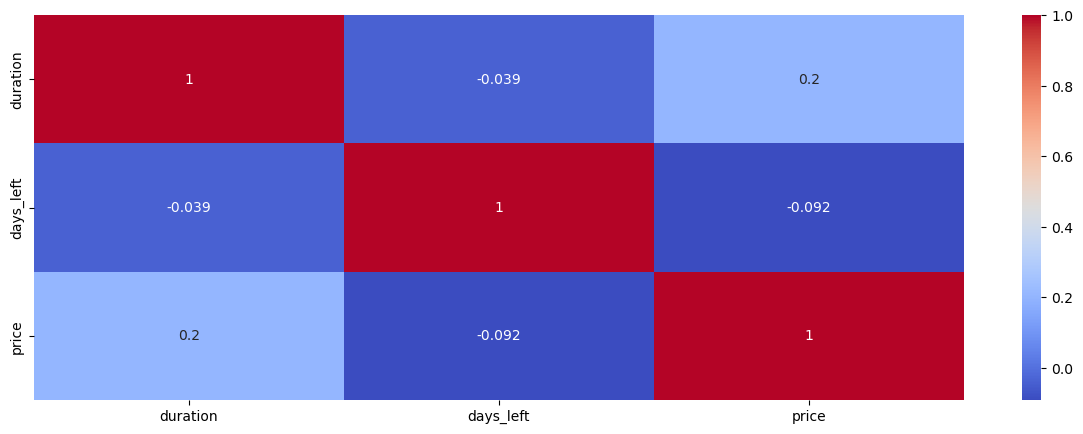

In [24]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap = 'coolwarm')
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_lst =[]

for i in df.columns:
    if ((df[i].dtypes!=object) & (i!='price')):
        col_lst.append(i)

x = df[col_lst]
vif = pd.DataFrame()
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif  
    
# VIF<5. Therefore, we shall not delete any columns/features.

,features,VIF
0,duration,2.325633
1,days_left,2.325633


Step 3: This is an regression dataset with target being 'price'. Therefore, we shall import regression algorithms. Also we shall standardize the dataset.

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
X_train,X_test, y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [7]:
numeric_features = ['duration', 'days_left']
numeric_transformer = StandardScaler()

In [8]:
categorical_features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore')

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [10]:
initial_pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

In [11]:
initial_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'days_left']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['airline', 'source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])]))])

In [12]:
# Fit and transform your data using the pipeline
X_train_transformed = initial_pipeline.fit_transform(X_train,y_train)
X_test_transformed = initial_pipeline.transform(X_test)

In [13]:
models = [
    # ["Linear Regression", LinearRegression()],
    # ["Random Forest Regressor", RandomForestRegressor(n_jobs=-1,random_state=42)],
    # ["Gradient Boosting Regressor", GradientBoostingRegressor(random_state=42)],
    ["XGBoost Regressor", XGBRegressor(n_jobs=-1,random_state=42)]
]

results = []

for name, model in models:
    model.fit(X_train_transformed, y_train)

    r2_scores = cross_val_score(model, X_train_transformed, y_train, cv=KFold(n_splits=3, shuffle=True, random_state=42), n_jobs=-1, scoring='r2')
    mean_r2 = r2_scores.mean()

    # Cross-Validated Mean Squared Error (MSE)
    mse_scores = -cross_val_score(model, X_train_transformed, y_train, cv=KFold(n_splits=3, shuffle=True, random_state=42), n_jobs=-1, scoring='neg_mean_squared_error')
    mean_mse = mse_scores.mean()

    # Root Mean Squared Error (RMSE)
    rmse_scores = np.sqrt(mse_scores)
    mean_rmse = rmse_scores.mean()

    # Test the model
    y_pred = model.predict(X_test_transformed)

    # Test R-squared (R²) score
    test_r2 = r2_score(y_test, y_pred)

    # Test Mean Squared Error (MSE)
    test_mse = mean_squared_error(y_test, y_pred)

    # Test Root Mean Squared Error (RMSE)
    test_rmse = np.sqrt(test_mse)

    results.append([name, round(mean_r2.mean(), 2), round(mean_mse.mean(), 2), round(mean_rmse.mean(), 2),
                    round(test_r2, 2), round(test_mse, 2), round(test_rmse, 2)]) # type: ignore

In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "CV R2", "Mean MSE", "Mean RMSE",
                                            "Test R2", "Test MSE", "Test RMSE"]
                          
                        ).sort_values(by="Test RMSE", ascending=True)
results_df

,Model,CV R2,Mean MSE,Mean RMSE,Test R2,Test MSE,Test RMSE
1,Random Forest Regressor,0.98,7866207.87,2804.64,0.98,7834534.34,2799.02
3,XGBoost Regressor,0.98,12411579.15,3522.98,0.98,12426581.94,3525.14
2,Gradient Boosting Regressor,0.95,24575128.92,4957.30,0.95,25011205.56,5001.12
0,Linear Regression,0.91,45609018.62,6753.43,0.91,45720769.76,6761.71


## Reasons for not using Hyperparameter:

1. **High R-squared Score**: An R² score of 98% suggests that the model is explaining a significant portion of the variance in the target variable (flight ticket prices). This is a strong indicator of model quality.

2. **Overfitting Risk**: If you continue to tune hyperparameters aggressively, you may inadvertently overfit the model to the training data, causing it to perform poorly on unseen data (test data or new data).

3. **Resource and Time Constraints**: Hyperparameter tuning can be computationally expensive, especially if you're searching over a wide range of values with a large number of iterations. Consider whether you have the computational resources and time to perform extensive tuning.

4. **Stability**: Current model seem to be working well, and there's no guarantee that further tuning will lead to better results. Sometimes, small improvements in performance are not worth the effort and risk.

5. **Validation**: The model evaluation process is robust, and the 97% R² score is a reliable estimate of model's performance. Use proper cross-validation techniques to assess model stability and generalization.

In [37]:
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('RandomForestRegressor', RandomForestRegressor(n_jobs=-1,random_state=42))
]) 

In [10]:
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('XGBoost', XGBRegressor(n_jobs=-1,random_state=42))
]) 

In [11]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'days_left']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['airline', 'source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('XGBoost',
                 XGBRegressor(base_score=None, booster=None, callbac...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=-1, num_parallel_tree=None, predictor=None,
                              random_state=42, ...))])

In [12]:
y_pred = final_pipeline.predict(X_test)

In [13]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", round(rmse,3))

# R-squared (R²) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", round(r2,2))

Mean Absolute Error: 2006.7854903892917
Mean Squared Error: 12426581.939467764
Root Mean Squared Error: 3525.136
R-squared (R²) Score: 0.98


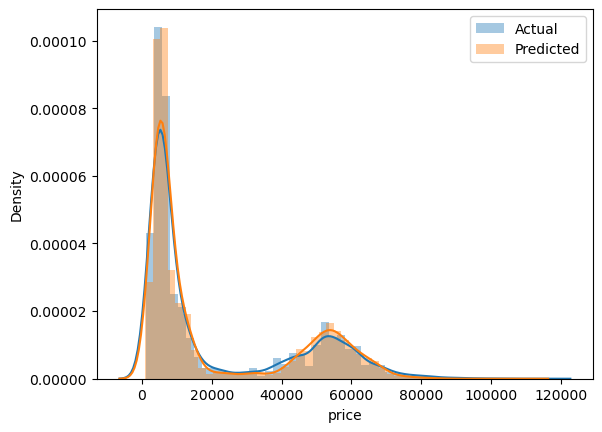

In [14]:
sns.distplot(y_test, label ='Actual')
sns.distplot(y_pred, label ='Predicted')
plt.legend()
plt.show() # The true prediction line is overlapping over the prediction line which is good.

Normal Distribution

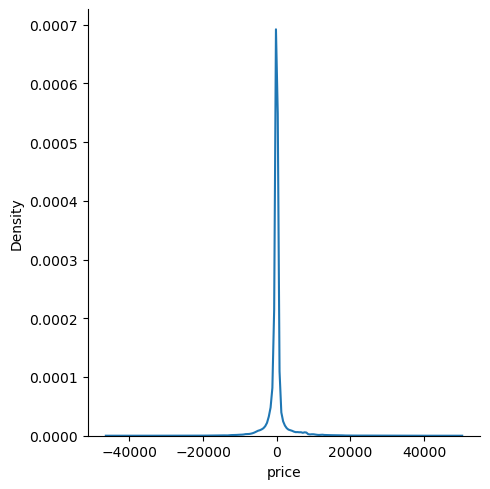

In [42]:
residual = y_test - y_pred
sns.displot(residual,kind='kde')

Q-Q Plot

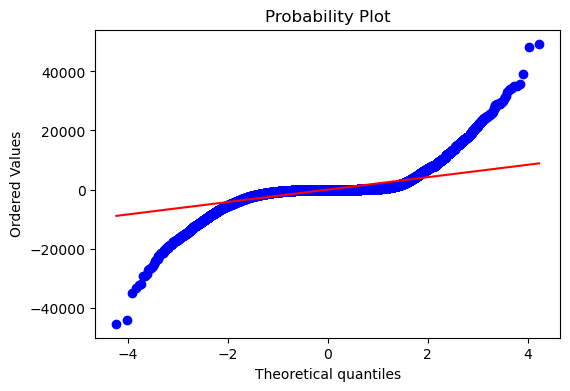

In [43]:
import scipy as sp
fig,ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)
plt.show()

**Insights we gained from Exploratory Data Analysis (EDA):**

- **Airlines:** Vistara is the most expensive airline, while AirAsia is the most affordable, catering to cost-conscious travelers.
  
- **Departure Time:** Pricing varies based on departure time, with late-night flights being the most affordable. However, late-night flights are less preferred, likely due to factors such as sleep disruption and safety concerns.
  
- **Duration:** A correlation exists between flight duration and ticket price. Longer-duration flights tend to have lower prices, up to a certain threshold.
  
- **Source and Destination Choices:** The popularity of Mumbai and Delhi as source and destination cities suggests that these cities serve as major travel hubs, providing travelers with extensive flight options and connectivity to their desired destinations.

- **Airline Preferences:** Traveler preferences for specific airlines can influence ticket pricing, considering factors such as service quality, reputation, and loyalty programs.

- **Time-of-Day Travel:** Late-night flights are more affordable but may affect traveler convenience and comfort. Passengers may opt for daytime or evening flights for more convenient travel experiences.

- **Stopover Considerations:** The number of stops directly affects pricing, with more stops leading to higher prices. Travelers should weigh the trade-off between the number of stops and ticket price based on their priorities, such as time efficiency or cost savings.

- **Class Preferences:** The significant price difference between business and economy class tickets highlights the importance of understanding traveler preferences and budget constraints when booking flights. Only two airlines offer business class for domestic flights.

- **Booking Timing:** Booking tickets well in advance can secure more favorable prices, as prices tend to increase as the departure date approaches, with a noticeable increase within 20 days of departure.

These insights collectively provide a comprehensive understanding of the factors influencing flight ticket prices and traveler decision-making, assisting travelers in making informed choices and aiding airlines in optimizing pricing strategies.

# **Conclusion**

- This project successfully develops a flight price prediction model with an impressive accuracy rate of approximately 98%.
- Key steps, such as data preprocessing, feature selection, and model evaluation, contribute significantly to the model's accuracy.
- The RandomForestRegressor is designated as the final model due to its superior performance among the tested models.
- Distribution plots effectively demonstrate the strong alignment between predicted and actual prices, affirming the model's capability to capture underlying data patterns.


Overall, this project showcases a proficient grasp of data analysis, preprocessing, modeling, and evaluation techniques in machine learning. The attained accuracy underscores the model's effectiveness in predicting flight prices, with potential for further improvements through additional data and features.


In [16]:
import pickle

model_to_save = final_pipeline

# Save the trained model to a file using pickle
with open('XGBoost_model.pkl', 'wb') as model_file:
    pickle.dump(model_to_save, model_file)

Please note that saving the pickle file with RandomForestRegressor leads to very large file size of around 950mb.